# 비어플 16기 신입세션 1주차 과제 - 함주헌

## 1. 관심있는 주제와 이유

 데이터 링크: https://www.kaggle.com/datasets/mjshri23/life-expectancy-and-socio-economic-world-bank.  

저는 gdp나 여러가지 사회 경제적 요인이 기대 수명에 미치는 영향이 궁금해 다음과 같은 데이터를 선정했습니다.

##  2. 타이타닉 데이터 EDA 및 전처리

### 0. 도메인 살펴보기 : 타이타닉 데이터

1. 개요
- 타이타닉 데이터셋은 타이타닉 침몰 사건을 기반으로, 탑승객들의 다양한 정보와 생존 여부를 포함하고 있다.

2. 데이터 변수 설명
- 'Survived' : 탑승객이 생존했는지 여부를 나타내는 변수(0 사망, 1 생존)
- 'Pclass' : 승객이 예약한 티켓의 등급(1: 1등석, 2: 2등석, 3: 3등석)
- 'Name' : 승객의 전체 이름
- 'Sex' : 승객의 성별
- 'Age' : 승객의 나이 
- 'SibSp' : 함께 탑승한 형제 또는 배우자 수
- 'Parch' : 함께 탑승한 부모 또는 자녀 수
- 'Ticket' : 승객의 티켓 번호
- 'Fare' : 승객이 지불한 티켓 요금
- 'Cabin' : 승객의 선실 번호
- 'Embarked' : 승객이 탑승한 항구(C: Cherbourg, Q: Queenstown, S: Southampton)

### 1. 가설 세우기
- 1등석의 생존율이 2등석과 3등석의 승객보다 높을 것이다.
- 어린이의 생존율이 성인보다 높을 것이다.
- 탑승 항구가 생존율에 영향을 미쳤을 것이다.
- 가족과 함께 탑승한 사람의 생존율이 더 높거나 낮을 것이다.
- 혼자 탑승한 사람이 생존율이 낮을 것이다.

### 2. 데이터 불러오기

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
data = pd.read_csv('/Users/zoohunn/Desktop/비어플/Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
data.shape

(891, 12)

타이타닉 데이터는 891개의 로우와 12개의 칼럼으로 이루어져있다.

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [58]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 3. 결측값/중복값 확인

In [61]:
data.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

Cabin 열에 가장 많은 결측값이 존재하고, Age, Embarked 열에도 결측값이 존재함을 알 수 있다.

In [64]:
data[data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


중복값이 없음

### 4. 결측값 처리

In [68]:
df = data.copy()
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [70]:
df['Cabin'].value_counts(dropna=False)

Cabin
NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

In [72]:
# 결측값에 대해 'Unknown'으로 채워넣는다.
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [74]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [76]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [78]:
# 'Age'칼럼의 결측값을 평균 나이로, 'Embarked'칼럼의 결측값을 빈도수가 가장 많은 'S'로 대체해 모든 결손 데이터 처리
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna('S')

In [80]:
# 결측값 여부 다시 확인
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 승객의 티켓등급에 따른 생존율 확인

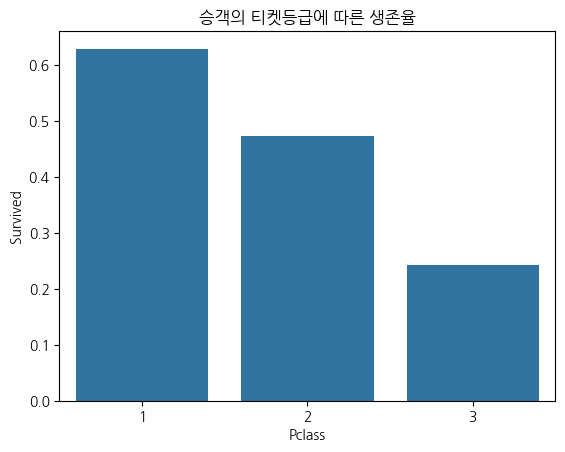

In [83]:
survival_rate = df.groupby('Pclass')['Survived'].mean().reset_index()
sns.barplot(data=survival_rate, x='Pclass', y='Survived')
plt.title('승객의 티켓등급에 따른 생존율')
plt.show()

티켓 등급이 높을수록 생존율이 높음을 알 수 있다.

### 가족과 함께 탑승한 사람의 생존율

In [96]:
# 가족과 함께 탑승한 사람의 생존율을 확인하기 위해 'SibSp'와 'Parch'을 이용해 가족 수를 계산하고, 가족과 함께 탑승 여부를 나타내는 변수를 새로 생성해준다.
df['family_size'] = df['SibSp'] + df['Parch']

In [100]:
# 가족 여부 생성
df['with_family'] = df['family_size'].apply(lambda x: 1 if x>0 else 0)

<Axes: xlabel='with_family', ylabel='Survived'>

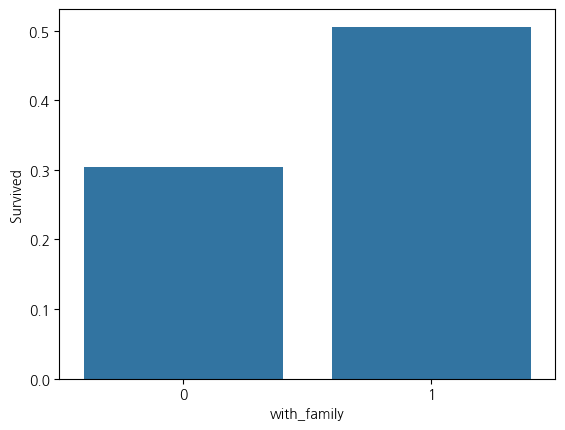

In [106]:
# 가족 여부에 따른 생존율 계산
survival_rate = df.groupby('with_family')['Survived'].mean().reset_index()
sns.barplot(data=survival_rate, x='with_family', y='Survived')

가족과 함께 탑승한 승객의 생존율이 혼자 탑승한 승객보다 높은 경향을 보임을 알 수 있다.